In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-dog-cats/sample/train/cats/cat.4796.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.11745.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.12109.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.172.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.8145.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.6051.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.5988.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.7665.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.10501.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.11959.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.635.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.1616.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.7320.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.6818.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.4454.jpg
/kaggle/input/sample-dog-cats/sample/train/cats/cat.9320.jpg
/kaggle/input/sample-d

/kaggle/input/sample-dog-cats/sample/validation/cats/cat.5434.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.2835.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.11839.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.1359.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.5981.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.9857.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.11121.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.522.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.6533.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.2040.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.1768.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.2097.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.8548.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.815.jpg
/kaggle/input/sample-dog-cats/sample/validation/cats/cat.5025.jpg
/kaggle/in

In [19]:
import os
base_dir = '/kaggle/input/sample-dog-cats/sample'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

#Directory with training cat/dogs images
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

#Directory with validation cat/dogs images
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [20]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.4796.jpg', 'cat.11745.jpg', 'cat.12109.jpg', 'cat.172.jpg', 'cat.8145.jpg', 'cat.6051.jpg', 'cat.5988.jpg', 'cat.7665.jpg', 'cat.10501.jpg', 'cat.11959.jpg']
['dog.8897.jpg', 'dog.533.jpg', 'dog.9777.jpg', 'dog.12364.jpg', 'dog.6126.jpg', 'dog.1896.jpg', 'dog.9708.jpg', 'dog.3569.jpg', 'dog.1233.jpg', 'dog.10433.jpg']


In [21]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [22]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 #Index for iterating over images

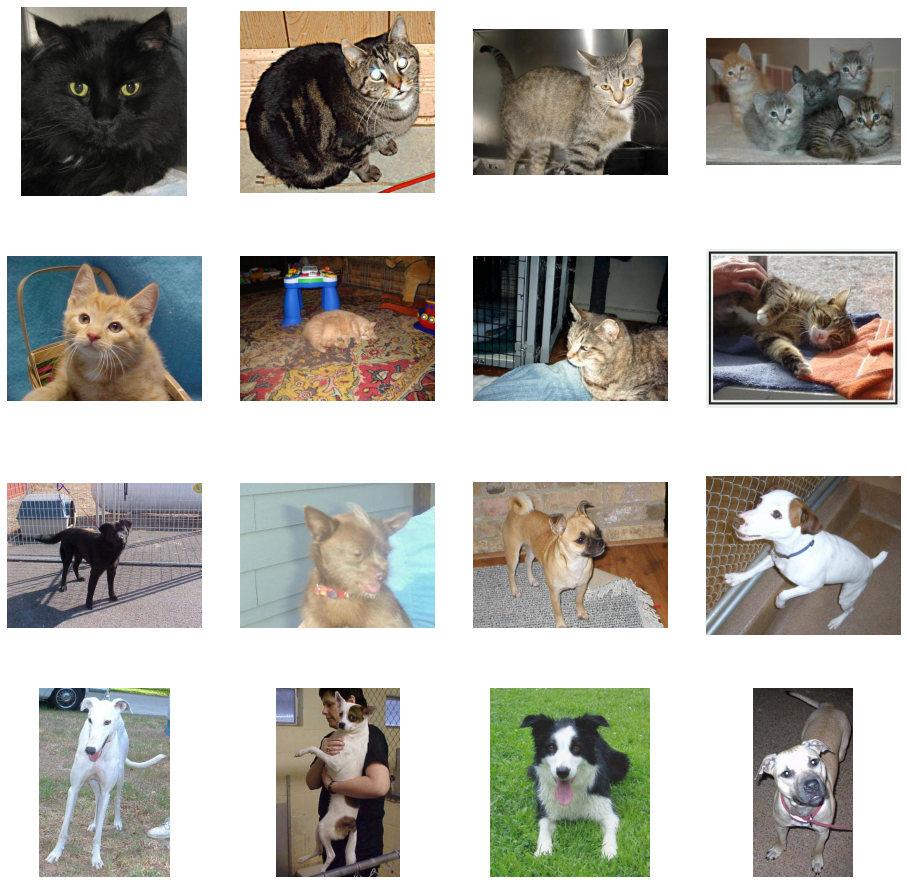

In [23]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir,fname)
               for fname in train_cat_fnames[pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i,img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(nrows,ncols,i + 1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()



In [24]:
import tensorflow as tf

In [25]:
print(tf.__version__)

2.3.0


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [28]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
#Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir, # This is the source directory for training image
                target_size= (150,150), #All image will be resized to the target
                batch_size = 20,
                class_mode = 'binary'
                )

Found 2000 images belonging to 2 classes.


In [32]:
#Flow validation. images in batches of 20 using validation_datagen generator
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size= (150,150),
                        batch_size= 20,
                        class_mode= 'binary'
                        )

Found 1000 images belonging to 2 classes.


In [33]:
hisory = model.fit(
        train_generator,
        steps_per_epoch= 100, #2000 images = batch_size * steps
        epochs= 100,
        validation_data= validation_generator,
        validation_steps= 50,
        verbose=2)

Epoch 1/100
100/100 - 9s - loss: 1.0754 - accuracy: 0.5790 - val_loss: 0.6678 - val_accuracy: 0.5670
Epoch 2/100
100/100 - 9s - loss: 0.6405 - accuracy: 0.6485 - val_loss: 0.6129 - val_accuracy: 0.6470
Epoch 3/100
100/100 - 9s - loss: 0.5779 - accuracy: 0.7105 - val_loss: 0.5886 - val_accuracy: 0.6800
Epoch 4/100
100/100 - 9s - loss: 0.5100 - accuracy: 0.7455 - val_loss: 0.6048 - val_accuracy: 0.6940
Epoch 5/100
100/100 - 9s - loss: 0.4446 - accuracy: 0.7890 - val_loss: 0.6017 - val_accuracy: 0.7150
Epoch 6/100
100/100 - 9s - loss: 0.3425 - accuracy: 0.8480 - val_loss: 0.6967 - val_accuracy: 0.6890
Epoch 7/100
100/100 - 9s - loss: 0.2605 - accuracy: 0.8920 - val_loss: 0.7615 - val_accuracy: 0.6960
Epoch 8/100
100/100 - 10s - loss: 0.1872 - accuracy: 0.9290 - val_loss: 0.9119 - val_accuracy: 0.6800
Epoch 9/100
100/100 - 9s - loss: 0.1539 - accuracy: 0.9430 - val_loss: 1.0795 - val_accuracy: 0.7070
Epoch 10/100
100/100 - 9s - loss: 0.1029 - accuracy: 0.9640 - val_loss: 1.3557 - val_accur

Epoch 81/100
100/100 - 9s - loss: 9.3424e-07 - accuracy: 1.0000 - val_loss: 8.2444 - val_accuracy: 0.6970
Epoch 82/100
100/100 - 9s - loss: 0.0125 - accuracy: 0.9990 - val_loss: 7.9149 - val_accuracy: 0.6900
Epoch 83/100
100/100 - 9s - loss: 7.6286e-09 - accuracy: 1.0000 - val_loss: 8.1371 - val_accuracy: 0.6930
Epoch 84/100
100/100 - 9s - loss: 9.2702e-11 - accuracy: 1.0000 - val_loss: 8.1171 - val_accuracy: 0.6910
Epoch 85/100
100/100 - 9s - loss: 7.3727e-11 - accuracy: 1.0000 - val_loss: 8.0968 - val_accuracy: 0.6890
Epoch 86/100
100/100 - 9s - loss: 2.6158e-11 - accuracy: 1.0000 - val_loss: 8.0560 - val_accuracy: 0.6920
Epoch 87/100
100/100 - 9s - loss: 3.3549e-11 - accuracy: 1.0000 - val_loss: 8.0399 - val_accuracy: 0.6930
Epoch 88/100
100/100 - 9s - loss: 3.5682e-11 - accuracy: 1.0000 - val_loss: 8.0293 - val_accuracy: 0.6930
Epoch 89/100
100/100 - 9s - loss: 3.8143e-11 - accuracy: 1.0000 - val_loss: 8.0214 - val_accuracy: 0.6920
Epoch 90/100
100/100 - 9s - loss: 4.1702e-11 - acc

In [35]:
history = hisory

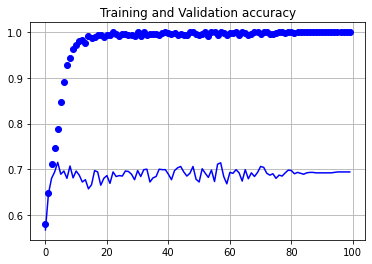

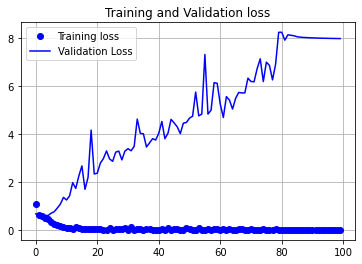

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc, 'bo', label = 'Training accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.grid()
plt.show()

The Training accuracy is close to 100% and the validation accuracy is in the 70%-80% range. This is a great example of overfitting = which in short means that it can do very well with the images it has seen before, but not well with the images it hasn't. Things to try to solve the problem of overfitting:
1. Augmentation
2. Different Model

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 21s - loss: 0.6898 - accuracy: 0.5365 - val_loss: 0.6836 - val_accuracy: 0.5560
Epoch 2/100
100/100 - 20s - loss: 0.6761 - accuracy: 0.5790 - val_loss: 0.6607 - val_accuracy: 0.5900
Epoch 3/100
100/100 - 20s - loss: 0.6648 - accuracy: 0.5795 - val_loss: 0.6699 - val_accuracy: 0.5930
Epoch 4/100
100/100 - 20s - loss: 0.6519 - accuracy: 0.6095 - val_loss: 0.6231 - val_accuracy: 0.6520
Epoch 5/100
100/100 - 19s - loss: 0.6395 - accuracy: 0.6300 - val_loss: 0.6007 - val_accuracy: 0.6900
Epoch 6/100
100/100 - 20s - loss: 0.6331 - accuracy: 0.6310 - val_loss: 0.6603 - val_accuracy: 0.5890
Epoch 7/100
100/100 - 21s - loss: 0.6164 - accuracy: 0.6450 - val_loss: 0.5966 - val_accuracy: 0.6850
Epoch 8/100
100/100 - 20s - loss: 0.6138 - accuracy: 0.6550 - val_loss: 0.5698 - val_accuracy: 0.6970
Epoch 9/100
100/100 - 19s - loss: 0.6068 - accuracy: 0.6625 - val_loss: 0.5823 - val_accuracy: 0.684

Epoch 80/100
100/100 - 19s - loss: 0.3950 - accuracy: 0.8240 - val_loss: 0.4300 - val_accuracy: 0.8070
Epoch 81/100
100/100 - 19s - loss: 0.3983 - accuracy: 0.8190 - val_loss: 0.4162 - val_accuracy: 0.8230
Epoch 82/100
100/100 - 20s - loss: 0.4019 - accuracy: 0.8185 - val_loss: 0.4199 - val_accuracy: 0.8190
Epoch 83/100
100/100 - 19s - loss: 0.3904 - accuracy: 0.8175 - val_loss: 0.4197 - val_accuracy: 0.8050
Epoch 84/100
100/100 - 19s - loss: 0.3931 - accuracy: 0.8165 - val_loss: 0.4128 - val_accuracy: 0.8200
Epoch 85/100
100/100 - 20s - loss: 0.3941 - accuracy: 0.8180 - val_loss: 0.4032 - val_accuracy: 0.8130
Epoch 86/100
100/100 - 18s - loss: 0.4030 - accuracy: 0.8180 - val_loss: 0.3876 - val_accuracy: 0.8260
Epoch 87/100
100/100 - 18s - loss: 0.4026 - accuracy: 0.8205 - val_loss: 0.3984 - val_accuracy: 0.8260
Epoch 88/100
100/100 - 20s - loss: 0.3940 - accuracy: 0.8170 - val_loss: 0.4334 - val_accuracy: 0.8110
Epoch 89/100
100/100 - 19s - loss: 0.3986 - accuracy: 0.8280 - val_loss: 

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc, 'bo', label = 'Training accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.grid()
plt.show()